**Mnist using CNN**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as k
from keras.layers import Dense,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")



In [6]:
from tensorflow.keras.datasets import mnist

(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

labels:0


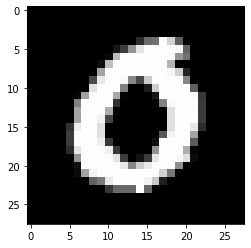

In [9]:
print("labels:{}".format(ytrain[8000]))
plt.imshow(xtrain[8000],cmap='gray')

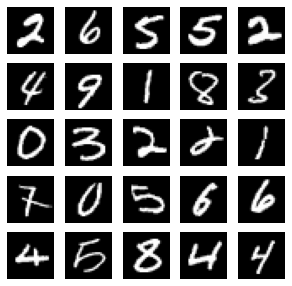

In [11]:
index=np.random.randint(0,xtrain.shape[0],size =25)
images=xtrain[index]
labels=ytrain[index]

plt.figure(figsize=(5,5))
for i in range(len(index)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    
plt.show()

In [12]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Reshape train and test data into compatible shape that is (number of examples, hight, width, channel)**


In [14]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)

In [15]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**normalizing data**

In [27]:
Xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain= xtrain/255
xtest= xtest/255

**one-hot encode the class vector**

In [31]:
ytrain=to_categorical(ytrain,num_classes=10)
ytest=to_categorical(ytest,num_classes=10)

**Building Convolutional Neural Network**

In [39]:
mnist=Sequential()
mnist.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(28,28,1)))
mnist.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
mnist.add(Flatten()) 
mnist.add(Dense(128,activation="relu"))
mnist.add(Dense(10,activation="softmax"))

**compile and fit the model**

In [44]:
mnist.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
h=mnist.fit(xtrain,ytrain, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.1016 - val_accuracy: 0.9855
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0935 - val_accuracy: 0.9838
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0784 - val_accuracy: 0.9867
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1023 - val_accuracy: 0.9841
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1095 - val_accuracy: 0.9840
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0949 - val_accuracy: 0.9867
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0874 - val_accuracy:

In [45]:
loss,acc=mnist.evaluate(xtest,ytest)
print("test accuracy:",acc)
print("test loss:",loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9856
test accuracy: 0.9855999946594238
test loss: 0.10676281899213791


In [46]:
loss,acc=mnist.evaluate(xtrain,ytrain)
print("test accuracy:",acc)
print("test loss:",loss)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9940
test accuracy: 0.9940166473388672
test loss: 0.04334113374352455


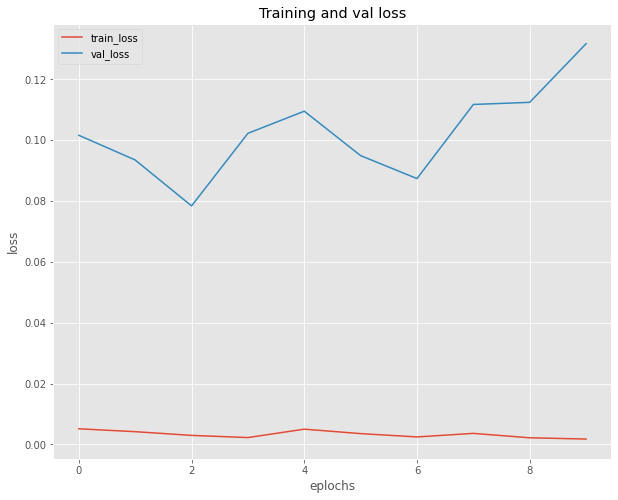

In [47]:
epochs=np.arange(0, len(h.history['loss']))
plt.figure(figsize=(10,8))


plt.style.use("ggplot")
plt.plot(epochs,h.history["loss"],label="train_loss")
plt.plot(epochs,h.history["val_loss"], label="val_loss")
plt.title("Training and val loss")
plt.xlabel("eplochs")
plt.ylabel("loss")
plt.legend()

**vanilla CNN+pooling+dropout**

In [91]:
from keras.layers import Dropout
mnist=Sequential()
mnist.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(28,28,1)))
mnist.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
mnist.add(MaxPooling2D(pool_size=(2,2)))
mnist.add(Dropout(rate=0.2))
mnist.add(Flatten()) 
mnist.add(Dense(128,activation="relu"))
#mnist.add(Dropout(rate=0.2))
mnist.add(Dense(10,activation="softmax"))

In [92]:
mnist.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
h=mnist.fit(xtrain,ytrain, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.1484 - accuracy: 0.9554 - val_loss: 0.0705 - val_accuracy: 0.9780
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0618 - val_accuracy: 0.9817
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0523 - val_accuracy: 0.9846
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.0484 - val_accuracy: 0.9863
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0173 - accuracy: 0.9938 - val_loss: 0.0617 - val_accuracy: 0.9839
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0527 - val_accuracy: 0.9861
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0588 - val_accuracy:

In [93]:
loss,acc=mnist.evaluate(xtest,ytest)
print("test accuracy:",acc)
print("test loss:",loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9897
test accuracy: 0.9897000193595886
test loss: 0.048102814704179764


In [94]:
loss,acc=mnist.evaluate(xtrain,ytrain)
print("test accuracy:",acc)
print("test loss:",loss)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9956
test accuracy: 0.9955999851226807
test loss: 0.019518859684467316


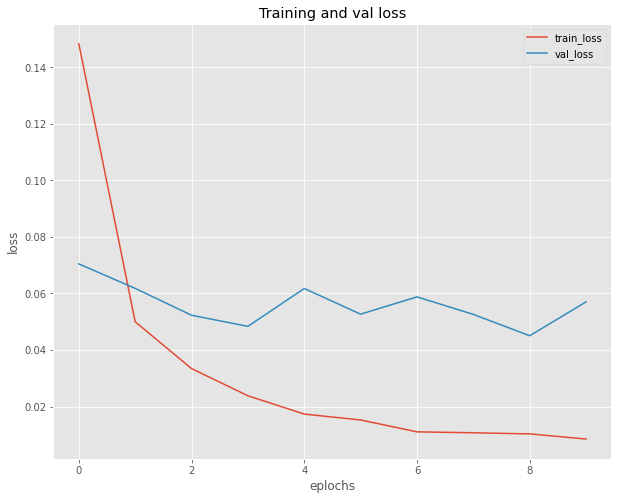

In [95]:
epochs=np.arange(0, len(h.history['loss']))
plt.figure(figsize=(10,8))


plt.style.use("ggplot")
plt.plot(epochs,h.history["loss"],label="train_loss")
plt.plot(epochs,h.history["val_loss"], label="val_loss")
plt.title("Training and val loss")
plt.xlabel("eplochs")
plt.ylabel("loss")
plt.legend()

1/1 [==============================] - 0s 63ms/step
predicted label: 9
output: [[2.3332451e-11 8.1707618e-10 2.4217536e-10 1.1996779e-11 5.2726491e-06
  1.0499277e-12 1.0923842e-14 5.1241320e-11 3.8281592e-05 9.9995649e-01]]
1.0


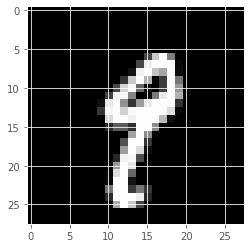

In [97]:
plt.imshow(xtest[78].reshape(28,28),cmap='gray')
ypred=mnist.predict(xtest[78].reshape(1,28,28,1))
print("predicted label:",ypred.argmax())
print("output:",ypred)
print(ypred.sum())